- ref. https://www.kaggle.com/apapiu/regularized-linear-models
- ref. https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [33]:
# load data
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
pd.set_option("display.width", 100)
pd.set_option("display.max_rows", 100)

train_df = pd.read_csv("./train.csv", header=0)
test_df = pd.read_csv("./test.csv", header=0)
train_id = train_df["Id"]
train_y = train_df["SalePrice"]
test_id = test_df["Id"]
all_df = pd.concat((train_df.loc[:,'MSSubClass':'SaleCondition'], test_df.loc[:,'MSSubClass':'SaleCondition']))
dfd = {'train': train_df, 'test': test_df}
for name,df in dfd.items():
    print(name)
    print(df.columns.values)

train
['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' '

In [34]:
# check data
for name,df in dfd.items():
    print(name)
    print(df.head(3))

train
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub   
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub   
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub   

     ...     PoolArea PoolQC Fence MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  \
0    ...            0    NaN   NaN         NaN       0      2   2008        WD         Normal   
1    ...            0    NaN   NaN         NaN       0      5   2007        WD         Normal   
2    ...            0    NaN   NaN         NaN       0      9   2008        WD         Normal   

   SalePrice  
0     208500  
1     181500  
2     223500  

[3 rows x 81 columns]
test
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
0  1461          20       RH      

In [35]:
# check data
for name,df in dfd.items():
    print(name)
    print(df.info())

train


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [36]:
# check data
for name,df in dfd.items():
    print(name)
    print(df.describe(include='all').T)

train


              count unique      top  freq       mean       std    min     25%     50%      75%  \
Id             1460    NaN      NaN   NaN      730.5    421.61      1  365.75   730.5  1095.25   
MSSubClass     1460    NaN      NaN   NaN    56.8973   42.3006     20      20      50       70   
MSZoning       1460      5       RL  1151        NaN       NaN    NaN     NaN     NaN      NaN   
LotFrontage    1201    NaN      NaN   NaN      70.05   24.2848     21      59      69       80   
LotArea        1460    NaN      NaN   NaN    10516.8   9981.26   1300  7553.5  9478.5  11601.5   
Street         1460      2     Pave  1454        NaN       NaN    NaN     NaN     NaN      NaN   
Alley            91      2     Grvl    50        NaN       NaN    NaN     NaN     NaN      NaN   
LotShape       1460      4      Reg   925        NaN       NaN    NaN     NaN     NaN      NaN   
LandContour    1460      4      Lvl  1311        NaN       NaN    NaN     NaN     NaN      NaN   
Utilities      1460 

              count unique      top  freq       mean       std   min     25%    50%      75%  \
Id             1459    NaN      NaN   NaN       2190   421.321  1461  1825.5   2190   2554.5   
MSSubClass     1459    NaN      NaN   NaN    57.3783   42.7469    20      20     50       70   
MSZoning       1455      5       RL  1114        NaN       NaN   NaN     NaN    NaN      NaN   
LotFrontage    1232    NaN      NaN   NaN    68.5804   22.3768    21      58     67       80   
LotArea        1459    NaN      NaN   NaN    9819.16   4955.52  1470    7391   9399  11517.5   
Street         1459      2     Pave  1453        NaN       NaN   NaN     NaN    NaN      NaN   
Alley           107      2     Grvl    70        NaN       NaN   NaN     NaN    NaN      NaN   
LotShape       1459      4      Reg   934        NaN       NaN   NaN     NaN    NaN      NaN   
LandContour    1459      4      Lvl  1311        NaN       NaN   NaN     NaN    NaN      NaN   
Utilities      1457      1   AllPub  145

In [37]:
# check datatype
int_cols = all_df.select_dtypes(['int64']).columns.values
## ref.
## int_cols = list(set(train_df.select_dtypes(['int64']).columns.values).union(set(test_df.select_dtypes(['int64']).columns.values)))
print(int_cols)

['MSSubClass' 'LotArea' 'OverallQual' 'OverallCond' 'YearBuilt'
 'YearRemodAdd' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'FullBath'
 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces'
 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch'
 'PoolArea' 'MiscVal' 'MoSold' 'YrSold']


In [38]:
# check datatype
object_cols = all_df.select_dtypes(['object']).columns.values
## ref.
## object_cols = list(set(train_df.select_dtypes(['object']).columns.values).union(set(test_df.select_dtypes(['object']).columns.values)))
print(object_cols)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'FireplaceQu'
 'GarageType' 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive'
 'PoolQC' 'Fence' 'MiscFeature' 'SaleType' 'SaleCondition']


In [39]:
# check datatype
float_cols = all_df.select_dtypes(['float64']).columns.values
## ref.
## float_cols = list(set(train_df.select_dtypes(['float64']).columns.values).union(set(test_df.select_dtypes(['float64']).columns.values)))
print(float_cols)

['LotFrontage' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'BsmtFullBath' 'BsmtHalfBath' 'GarageYrBlt' 'GarageCars'
 'GarageArea']


In [40]:
# check datatype
print(all_df.select_dtypes(exclude=['int64', 'object', 'float64']).columns.values)
## ref.
## print(train_df.select_dtypes(exclude=['int64', 'object', 'float64']).columns.values)
## print(test_df.select_dtypes(exclude=['int64', 'object', 'float64']).columns.values)

[]


In [41]:
# check null
for name,df in dfd.items():
    print(name)
    isnull_ratio = df.isnull().sum()/df.isnull().count()
    print(isnull_ratio[isnull_ratio != 0].sort_values(ascending=False))

train


PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64
test


PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
FireplaceQu     0.500343
LotFrontage     0.155586
GarageYrBlt     0.053461
GarageCond      0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtQual        0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
MasVnrType      0.010966
MasVnrArea      0.010281
MSZoning        0.002742
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
Utilities       0.001371
Functional      0.001371
Exterior2nd     0.000685
Exterior1st     0.000685
SaleType        0.000685
BsmtFinSF1      0.000685
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
KitchenQual     0.000685
GarageCars      0.000685
GarageArea      0.000685
TotalBsmtSF     0.000685
dtype: float64


In [42]:
# drop data with too many nulls
all_df = all_df.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1)
int_cols = all_df.select_dtypes(['int64']).columns.values
object_cols = all_df.select_dtypes(['object']).columns.values
float_cols = all_df.select_dtypes(['float64']).columns.values

# complete data
for col in int_cols.tolist() + float_cols.tolist():
    all_df[col] = all_df[col].fillna(all_df[col].mean())
for col in object_cols:
    all_df[col] = all_df[col].fillna(all_df[col].mode()[0])

isnull_sum = all_df.isnull().sum()
print(isnull_sum[isnull_sum != 0])

Series([], dtype: int64)


In [43]:
# check correlation (takes time and requires LabelEncoder)

# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# for col in object_cols:
#     all_df[col] = le.fit_transform(all_df[col])
## ref.
## for (name,df_org),(_name,df_obj) in zip(dfd.items(), object_dfd.items()):
##     for col in df_obj:
##         mapping = dict((v, k) for k,v in enumerate(df_obj[col].unique()))
##         df_org[col] = df_org[col].map(mapping).astype(int)

# train_x = all_df[:train_df.shape[0]]
# for col in train_x:
#     sns.jointplot(train_x[col], train_y)
#     plt.savefig("images/{}.png".format(col))
# plt.show()

In [44]:
# check correlation (takes time and requires LabelEncoder)
# plt.figure(figsize=(12, 8))
# sns.heatmap(train_x.astype(float).corr(), cmap=plt.cm.viridis, annot=False)
# plt.savefig("images/heat_all.png".format(col))
# plt.show()

In [45]:
# check correlation (takes time)
# concat_df = pd.concat((train_x, train_y), axis=1)
# col_labels = ['Area', 'Type', 'Qual', 'Cond', 'SF']
# col_list = []
# for label in col_labels:
#     cols = [col for col in train_df.columns if label in col]
#     cols.append('SalePrice')
#     col_list.append(cols)
# df_list = []
# tmp_df = concat_df
# for cols in col_list:
#     df_list.append(concat_df[cols])
#     tmp_df = tmp_df.drop(cols, axis=1, errors='ignore')
# df_list.append(tmp_df)
# for df in df_list:
#     sns.heatmap(df.astype(float).corr(), cmap=plt.cm.viridis, annot=False)
#     plt.show()

In [46]:
# change categorical values to dummy variable(vector)
# get_dummies is better than LabelEncoder for learning
all_df = pd.get_dummies(all_df)
print(all_df.head())

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60         65.0     8450            7            5       2003          2003   
1          20         80.0     9600            6            8       1976          1976   
2          60         68.0    11250            7            5       2001          2002   
3          70         60.0     9550            7            5       1915          1970   
4          60         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2          ...            SaleType_ConLw  SaleType_New  \
0       196.0       706.0         0.0          ...                         0             0   
1         0.0       978.0         0.0          ...                         0             0   
2       162.0       486.0         0.0          ...                         0             0   
3         0.0       216.0         0.0          ...                         0       

In [47]:
# check correlation
train_x = all_df[:train_df.shape[0]]
concat_df = pd.concat((train_x, train_y), axis=1)
print(concat_df.astype(float).corr()['SalePrice'].sort_values(ascending=False))

SalePrice                1.000000
OverallQual              0.790982
GrLivArea                0.708624
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
FullBath                 0.560664
BsmtQual_Ex              0.553105
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
YearRemodAdd             0.507101
KitchenQual_Ex           0.504094
Foundation_PConc         0.497734
MasVnrArea               0.475210
GarageYrBlt              0.471062
Fireplaces               0.466929
ExterQual_Gd             0.452466
ExterQual_Ex             0.451164
BsmtFinType1_GLQ         0.434597
HeatingQC_Ex             0.434543
GarageFinish_Fin         0.419678
Neighborhood_NridgHt     0.402149
BsmtFinSF1               0.386420
SaleType_New             0.357509
SaleCondition_Partial    0.352060
LotFrontage              0.334820
MasVnrType_Stone         0.330476
Neighborhood_NoRidge     0.330424
WoodDeckSF    

In [48]:
# remove outlier
outlier_index = train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index
train_x = all_df[:train_x.shape[0]]
test_x = all_df[train_x.shape[0]:]
train_x = train_x.drop(outlier_index)
train_id = train_id.drop(outlier_index)
train_y = train_y.drop(outlier_index)
all_df = pd.concat((train_x, test_x))

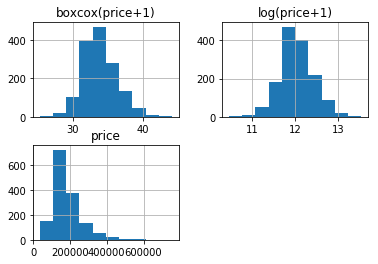

price: 1.8793604459195012, log(price+1): 0.12145464268184528, boxcox(price+1): 0.36801299071177224
MSSubClass        1.375131
LotArea          13.109495
OverallQual       0.189591
OverallCond       0.569314
YearBuilt        -0.599194
YearRemodAdd     -0.450134
1stFlrSF          1.257286
2ndFlrSF          0.861556
LowQualFinSF     12.084539
GrLivArea         1.068750
FullBath          0.165514
HalfBath          0.696666
BedroomAbvGr      0.326568
KitchenAbvGr      4.300550
TotRmsAbvGrd      0.749232
Fireplaces        0.725278
WoodDeckSF        1.844792
OpenPorchSF       2.529358
EnclosedPorch     4.002344
3SsnPorch        11.372080
ScreenPorch       3.945101
PoolArea         17.688664
MiscVal          21.939672
MoSold            0.197345
YrSold            0.131996
LotFrontage       1.225287
MasVnrArea        2.619644
BsmtFinSF1        0.980446
BsmtFinSF2        4.144394
BsmtUnfSF         0.919857
TotalBsmtSF       0.676310
BsmtFullBath      0.621532
BsmtHalfBath      3.929745
GarageYrBl

In [49]:
# check skewness
from scipy.stats import skew
from scipy.special import boxcox1p
price_log1p = np.log1p(train_y)
lmbda = 0.15
price_boxcox1p = boxcox1p(train_y, lmbda)
prices = pd.DataFrame({'price': train_y, 'log(price+1)': price_log1p, 'boxcox(price+1)': price_boxcox1p})
prices.hist()
plt.show()
print('price: {}, log(price+1): {}, boxcox(price+1): {}'.format(skew(train_y), skew(price_log1p), skew(price_boxcox1p)))
numerical_df = all_df[int_cols.tolist()+float_cols.tolist()]
skewness = numerical_df.apply(lambda x: skew(x.dropna()))
print(skewness)

In [50]:
# fix skewness
# boxcox became worse
train_y = price_log1p
#train_y = price_boxcox1p
skewed_features = skewness[skewness > 0.75].index.values.tolist()
all_df[skewed_features] = np.log1p(all_df[skewed_features])
#all_df[skewed_features] = boxcox1p(all_df[skewed_features], lmbda)

numerical_df = all_df[int_cols.tolist()+float_cols.tolist()]
skewness = numerical_df.apply(lambda x: skew(x.dropna()))
print(skewness)

MSSubClass        0.245930
LotArea          -0.532646
OverallQual       0.189591
OverallCond       0.569314
YearBuilt        -0.599194
YearRemodAdd     -0.450134
1stFlrSF          0.030358
2ndFlrSF          0.306628
LowQualFinSF      8.554639
GrLivArea        -0.022051
FullBath          0.165514
HalfBath          0.696666
BedroomAbvGr      0.326568
KitchenAbvGr      3.518883
TotRmsAbvGrd      0.749232
Fireplaces        0.725278
WoodDeckSF        0.159523
OpenPorchSF      -0.041538
EnclosedPorch     1.959952
3SsnPorch         8.822116
ScreenPorch       2.944570
PoolArea         15.623275
MiscVal           5.212005
MoSold            0.197345
YrSold            0.131996
LotFrontage      -1.068373
MasVnrArea        0.505956
BsmtFinSF1       -0.618046
BsmtFinSF2        2.457292
BsmtUnfSF        -2.158143
TotalBsmtSF       0.676310
BsmtFullBath      0.621532
BsmtHalfBath      3.772692
GarageYrBlt      -0.391922
GarageCars       -0.218015
GarageArea        0.218787
dtype: float64


In [51]:
# normalize (became worse)
# from sklearn.preprocessing import MinMaxScaler
# ms = MinMaxScaler()
# all_df[int_cols.tolist()+float_cols.tolist()] = ms.fit_transform(all_df[int_cols.tolist()+float_cols.tolist()])
## ref.
## all_df[int_cols.tolist()+float_cols.tolist()] = all_df[int_cols.tolist()+float_cols.tolist()].apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=0)

In [52]:
# feature engineering (became worse)
# all_df['TotalSF'] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] + all_df['2ndFlrSF']
# all_df = all_df.drop(['TotalBsmtSF'], axis=1)
# all_df = all_df.drop(['1stFlrSF'], axis=1)
# all_df = all_df.drop(['2ndFlrSF'], axis=1)

In [53]:
# check band (takes time)
# train_x = all_df[:train_df.shape[0]]
# concat_df = pd.concat((train_x, train_y), axis=1)
# for col in np.delete(concat_df.columns.values, -1):
#     concat_df[col] = pd.qcut(concat_df[col], 5, duplicates='drop')
#     print(concat_df[[col, 'SalePrice']].groupby([col], as_index=False).mean().sort_values(by=col, ascending=True))

In [54]:
# apply banding (became worse)
# band_dict = {
#     # 'GrLivArea': [-1, 1066.6, 1339.0, 1578.0, 1869.0, 9999999999],
#     # 'GarageArea': [-1, 295.6, 440.0, 516.0, 620.2, 9999999999],
#     # 'TotalBsmtSF': [-1, 756, 910, 1088, 1391, 9999999999],
#     # '1stFlrSF': [-1, 848.0, 1000.2, 1182.0, 1482.4, 9999999999],
#     # 'LotArea': [-1, 7078, 8793, 10198, 12205, 9999999999],
#     # 'BsmtUnfSF': [-1, 172.0, 374.6, 604.4, 896.0, 9999999999],
#     # 'BsmtFinSF1': [-1, 218.6, 525.6, 806.4, 9999999999],
#     # '2ndFlrSF': [-1, 455.4, 672.0, 796.2, 954.2, 9999999999],
#     # 'OpenPorchSF': [-1, 25.0, 40.0, 57.0, 83.2, 130.0, 9999999999],
#     # 'MSSubClass': [-1, 30.0, 60.0, 80.0, 9999999999],
#     # 'BsmtUnfSF': [-1, 172.0, 374.6, 604.4, 896.0, 9999999999],
#     # 'MasVnrArea': [-1, 25.2, 116.0, 205.2, 335.0, 9999999999],
#     'LotFrontage': [-1, 59.0, 68.0, 70.05, 80.0, 9999999999],
#     }
# for col,band in band_dict.items():
#     for i in range(len(band)-1):
#         all_df.loc[(all_df[col] > band[i]) & (all_df[col] <= band[i+1]), col] = i
#     print(col, all_df[col].head(3))

In [55]:
# prepare for learning, prediction and validation
train_x = all_df[:train_x.shape[0]]
test_x = all_df[train_x.shape[0]:]
print(train_x.head())
print(test_x.head())

   MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    4.110874     4.189655  9.042040            7            5       2003          2003   
1    3.044522     4.394449  9.169623            6            8       1976          1976   
2    4.110874     4.234107  9.328212            7            5       2001          2002   
3    4.262680     4.110874  9.164401            7            5       1915          1970   
4    4.110874     4.442651  9.565284            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2          ...            SaleType_ConLw  SaleType_New  \
0    5.283204    6.561031         0.0          ...                         0             0   
1    0.000000    6.886532         0.0          ...                         0             0   
2    5.093750    6.188264         0.0          ...                         0             0   
3    0.000000    5.379897         0.0          ...                         0 

   MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    3.044522     4.394449  9.360741            5            6       1961          1961   
1    3.044522     4.406719  9.565775            6            6       1958          1958   
2    4.110874     4.317488  9.534668            5            5       1997          1998   
3    4.110874     4.369448  9.208238            6            6       1998          1998   
4    4.795791     3.784190  8.518392            8            5       1992          1992   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2          ...            SaleType_ConLw  SaleType_New  \
0    0.000000    6.150603    4.976734          ...                         0             0   
1    4.691348    6.828712    0.000000          ...                         0             0   
2    0.000000    6.674561    0.000000          ...                         0             0   
3    3.044522    6.401917    0.000000          ...                         0 

In [56]:
# grid search on ridge parameter
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

tuned_parameters = [{'alpha': [0.01, 0.1, 0.1, 1, 10, 100, 1000]}]
ridge = Ridge(max_iter=10**5)
clf = GridSearchCV(ridge, tuned_parameters, cv=5, scoring='neg_mean_squared_error')
clf.fit(train_x, train_y)
print(clf.best_score_, clf.best_params_)
results = clf.cv_results_
for mean, std, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print("{:0.3f} (+/-{:0.03f} for {}".format(mean, std, params))

-0.0126070492336 {'alpha': 10}
-0.015 (+/-0.003 for {'alpha': 0.01}
-0.015 (+/-0.002 for {'alpha': 0.1}
-0.015 (+/-0.002 for {'alpha': 0.1}
-0.013 (+/-0.002 for {'alpha': 1}
-0.013 (+/-0.001 for {'alpha': 10}
-0.015 (+/-0.001 for {'alpha': 100}
-0.020 (+/-0.000 for {'alpha': 1000}


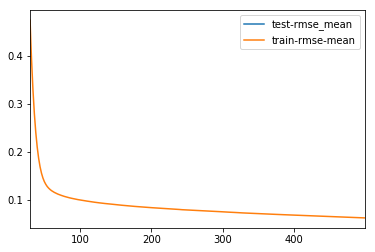

In [57]:
# grid search on xgboost
import xgboost as xgb
dtrain = xgb.DMatrix(train_x, label=train_y)
dtest = xgb.DMatrix(test_x)
params = {"max_depth": 2, "eta": 0.1}
xgb_model = xgb.cv(params, dtrain, num_boost_round=500, early_stopping_rounds=100)
xgb_model.loc[30:, ["test-rmse_mean", "train-rmse-mean"]].plot()
plt.show()

In [58]:
# cross validation
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, LassoLarsIC   # , LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import lightgbm as lgb
#from sklearn.svm import LinearSVR, SVR
from sklearn.model_selection import KFold, cross_validate

svr_params = {
    'kernel' : 'rbf',
    'C' : 1,
    'gamma' : 0.1
}

models = []
lr_model = LinearRegression()
models.append(('linear_regression', lr_model))
ridge_model = Ridge(max_iter=10**5, alpha=10)
models.append(('ridge', ridge_model))
lasso_model = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1, max_iter=10**5))
models.append(('lasso', lasso_model))
elasticnet_model = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3, max_iter=10**5))
models.append(('elasticnet', elasticnet_model))
kr_model = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
models.append(('kernel_ridge', kr_model))
gb_model = GradientBoostingRegressor(n_estimators=3600, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=5)
models.append(('gradient_boost', gb_model))
# models.append(('lasso', LassoCV(max_iter=10**5, alphas=[0.01, 0.1, 0.1, 1, 10, 100, 1000])))
# models.append(('elasticnet', ElasticNetCV(max_iter=10**5, alphas=[0.01, 0.1, 0.1, 1, 10, 100, 1000])))
#models.append(('linear svr', LinearSVR()))
#models.append(('svr', SVR(**svr_params)))
xgb_model = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, min_child_weight=1.7817, n_estimators=2200, reg_alpha=0.4640, reg_lambda=0.8571, subsample=0.5213, silent=1)
models.append(('xgboost', xgb_model))
lgb_model = lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.05, n_estimators=720, max_bin=55, bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.2319, feature_fraction_seed=9, bagging_seed=9, min_data_in_leaf=6, min_sum_hessian_in_leaf=11)
models.append(('lightgbm', lgb_model))
k_fold = KFold(n_splits=3)
results = {'model': [], 'test_mean': [], 'test_std': [], 'train_mean': [], 'train_std': []}
for name,model in models:
    scores = cross_validate(model, train_x, train_y, cv=k_fold, scoring='neg_mean_squared_error')
    results['model'].append(name)
    results['test_mean'].append(np.mean(scores['test_score']))
    results['test_std'].append(np.std(scores['test_score']))
    results['train_mean'].append(np.mean(scores['train_score']))
    results['train_std'].append(np.std(scores['train_score']))
print(pd.DataFrame(results).sort_values(by='test_mean', ascending=False))

               model  test_mean  test_std  train_mean  train_std
3         elasticnet  -0.012349  0.001639   -0.008966   0.000550
2              lasso  -0.012350  0.001644   -0.009107   0.000575
1              ridge  -0.012956  0.001615   -0.008890   0.000577
7           lightgbm  -0.014194  0.001800   -0.004068   0.000221
5     gradient_boost  -0.014205  0.001997   -0.001851   0.000482
6            xgboost  -0.014417  0.001344   -0.006503   0.000086
0  linear_regression  -0.015176  0.001405   -0.007253   0.000471
4       kernel_ridge  -0.034408  0.003845   -0.001881   0.000130


linear_regression
count      1459.000000
mean     179577.262754
std       82266.515272
min       38477.034501
25%      126813.059225
50%      159186.543331
75%      210968.899398
max      944595.913924
Name: SalePrice, dtype: float64


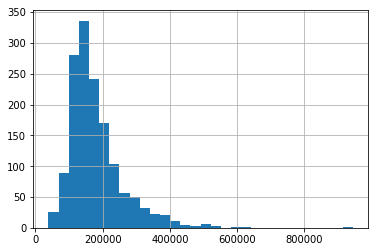

ridge
count    1.459000e+03
mean     1.789840e+05
std      8.084833e+04
min      4.777456e+04
25%      1.266686e+05
50%      1.572427e+05
75%      2.098608e+05
max      1.005162e+06
Name: SalePrice, dtype: float64


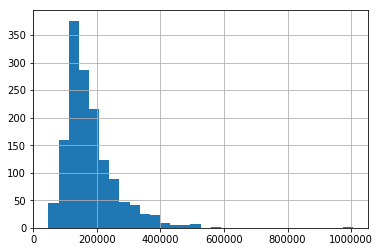

lasso
count      1459.000000
mean     178960.047990
std       79521.389560
min       43475.580523
25%      126656.235854
50%      157814.376481
75%      210674.798176
max      985314.053426
Name: SalePrice, dtype: float64


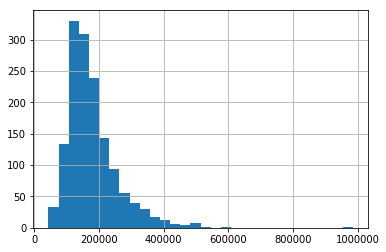

elasticnet
count      1459.000000
mean     178955.026113
std       79562.292497
min       43353.343045
25%      126623.123019
50%      157782.101267
75%      210721.712544
max      979964.018141
Name: SalePrice, dtype: float64


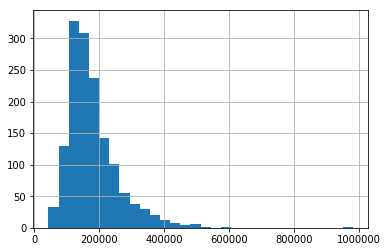

kernel_ridge
count    1.459000e+03
mean     1.821986e+05
std      1.049175e+05
min      9.606336e+03
25%      1.264193e+05
50%      1.619911e+05
75%      2.124716e+05
max      2.432239e+06
Name: SalePrice, dtype: float64


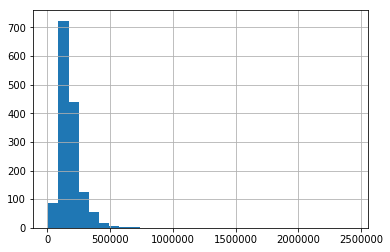

gradient_boost
count      1459.000000
mean     179159.934627
std       78297.051432
min       48896.348580
25%      128096.959082
50%      159588.164442
75%      208887.159373
max      665367.447545
Name: SalePrice, dtype: float64


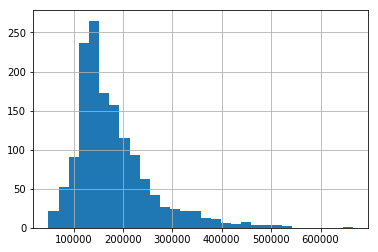

xgboost
count      1459.000000
mean     178290.890625
std       77994.679688
min       41230.820312
25%      128067.464844
50%      157629.046875
75%      208643.078125
max      667706.750000
Name: SalePrice, dtype: float64


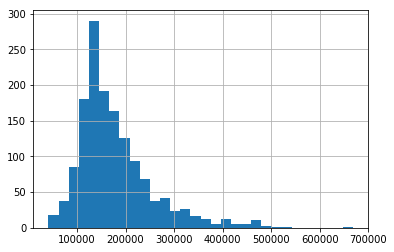

lightgbm
count      1459.000000
mean     178468.139644
std       78502.857298
min       44100.245429
25%      128403.504088
50%      156984.366421
75%      208058.972913
max      636483.835905
Name: SalePrice, dtype: float64


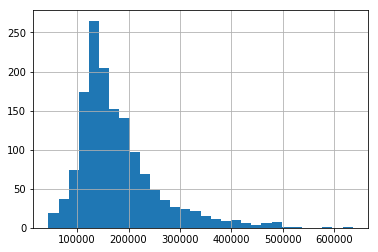

In [59]:
# learn and predict
from scipy.special import inv_boxcox1p
results = {}
for name,model in models:
    model.fit(train_x, train_y)
    output = np.expm1(model.predict(test_x))
    #output = inv_boxcox1p(model.predict(test_x), lmbda)
    results[name] = output
    submit = pd.DataFrame(data={'Id':test_id, 'SalePrice':output})
    #submit.loc[submit['SalePrice'] < 0, 'SalePrice'] = 0
    submit.to_csv('{}_submit.csv'.format(name), index=False)
    print(name)
    print(submit['SalePrice'].describe())
    submit['SalePrice'].hist(bins=30)
    plt.show()

0.007819604772196745


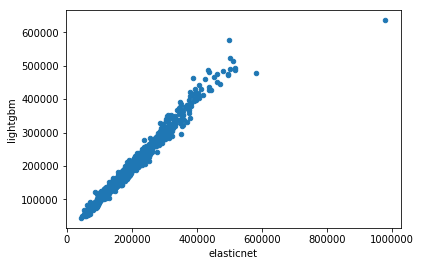

In [60]:
# averaging
elasticnet_train_y = elasticnet_model.predict(train_x)
lightgbm_train_y = lgb_model.predict(train_x)
output = 0.7*elasticnet_train_y + 0.3*lightgbm_train_y
print(((output - train_y)**2).mean())

predictions = pd.DataFrame({'elasticnet': results['elasticnet'], 'lightgbm': results['lightgbm']})
predictions.plot(x='elasticnet', y='lightgbm', kind='scatter')
plt.show()

output = 0.7*results['elasticnet'] + 0.3*results['lightgbm']
submit = pd.DataFrame(data={'Id':test_id, 'SalePrice':output})
submit.to_csv('lightgbm_elasticnet_submit.csv'.format(name), index=False)

In [61]:
# stacking
base_models = [clone(elasticnet_model), clone(lgb_model), clone(kr_model)]
meta_model = clone(xgb_model)
kfold = KFold(n_splits=len(base_models), shuffle=True, random_state=156)
out_of_fold_predictions = np.zeros((train_y.shape[0], len(base_models)))
X, y = train_x.values, train_y.values
for i,model in enumerate(base_models):
    for train_index,holdout_index in kfold.split(X, y):
        model.fit(X[train_index], y[train_index])
        out_of_fold_predictions[holdout_index, i] = model.predict(X[holdout_index])
meta_model.fit(out_of_fold_predictions, y)

out_of_fold_predictions = np.zeros((train_y.shape[0], len(base_models)))
for i,model in enumerate(base_models):
    out_of_fold_predictions[:, i] = model.predict(train_x)
output = meta_model.predict(out_of_fold_predictions)
print(((output - train_y)**2).mean())

out_of_fold_predictions = np.zeros((test_x.shape[0], len(base_models)))
for i,model in enumerate(base_models):
    out_of_fold_predictions[:, i] = model.predict(test_x)
output = np.expm1(meta_model.predict(out_of_fold_predictions))
#output = inv_boxcox1p(meta_model.predict(out_of_fold_predictions), lmbda)
submit = pd.DataFrame(data={'Id':test_id, 'SalePrice':output})
submit.to_csv('stacking_submit.csv'.format(name), index=False)

0.007351109857798748


GrLivArea                0.168565
1stFlrSF                 0.115633
Neighborhood_Crawfor     0.091074
LotArea                  0.083541
Neighborhood_StoneBr     0.075365
Functional_Typ           0.068684
Exterior1st_BrkFace      0.063801
MSZoning_FV              0.058420
OverallQual              0.049671
Neighborhood_NoRidge     0.048910
KitchenQual_Ex           0.042538
Condition1_Norm          0.042435
OverallCond              0.042167
Heating_GasW             0.038993
MSZoning_RH              0.037052
RoofMatl_WdShngl         0.036893
MSZoning_RL              0.036128
BsmtExposure_Gd          0.034703
GarageQual_Ex            0.034378
BsmtQual_Ex              0.032696
SaleCondition_Normal     0.031673
FullBath                 0.031245
LotConfig_CulDSac        0.030954
Neighborhood_BrkSide     0.029572
SaleType_New             0.028819
Condition1_PosN          0.028060
GarageCars               0.027806
GarageType_BuiltIn       0.027561
CentralAir_Y             0.027409
HalfBath      

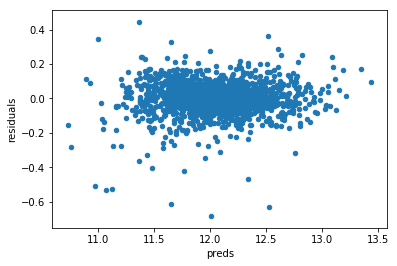

In [62]:
# check the result of ridge regression
# check feature importance
coef = pd.Series(ridge_model.coef_, index = train_x.columns).sort_values(ascending=False)
print(coef)
# draw residuals
train_preds = ridge_model.predict(train_x)
residuals = pd.DataFrame({"preds": train_preds, "residuals": train_y-train_preds})
residuals.plot(x='preds', y='residuals', kind='scatter')
plt.show()

In [63]:
# try neural network (not a scikit-learn estimator, takes time)
# from keras.layers import Dense
# from keras.models import Sequential
# from keras.regularizers import l1
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# X_train = StandardScaler().fit_transform(train_x)
# X_tr, X_val, y_tr, y_val = train_test_split(X_train, train_y, random_state=3)
# nn_model = Sequential()
# nn_model.add(Dense(1, input_dim=X_train.shape[1], W_regularizer=l1(0.001)))
# nn_model.compile(loss='mse', optimizer='adam')
# print(nn_model.summary())
# hist = nn_model.fit(X_tr, y_tr, validation_data = (X_val, y_val))
# print(hist)
# output = pd.Series(np.expm1(nn_model.predict(X_val)[:,0]))
# submit = pd.DataFrame(data={'Id':test_id, 'SalePrice':output})
# submit.to_csv('nn_submit.csv'.format(name), index=False)
# output.hist(bins=30)
# plt.show()

In [64]:
!head ridge_submit.csv

Id,SalePrice
1461,120148.32877716002
1462,156012.40795492483
1463,183974.50349011942
1464,201149.9334308373
1465,196764.25520275184
1466,167338.3715011396
1467,174639.46152206365
1468,159850.25434259005
1469,192716.0196782362
